# <div style="text-align: center;"><span style="color: orange; background-color: #808000; font-family: 'Times New Roman', serif; font-size: 44px; font-weight: bold; padding: 10px; border-radius: 10px; text-shadow: 4px 5px 6px rgba(0, 0, 0, 0.5);">Sentiment Analysis of NLP</span></div>


> # <span style="color: #808000">Sentiment Analysis of NLP</span> 🏡💰
![](https://up.yimg.com/ib/th?id=OIP.xhbmBdR3enTVb0IMfgffiAHaDX&pid=Api&rs=1&c=1&qlt=95&w=195&h=88)

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> Methodology of the Notebook</span>
1. **Introduction**:
   - Briefly introduce the topic of sentiment analysis and its importance in understanding public opinion. 📈
   - Provide context about the IMDB dataset and its significance as a benchmark dataset for sentiment analysis. 📊

2. **Dataset Overview**:
   - Describe the IMDB dataset, including the number of samples, the structure of the data, and the sentiment labels (positive/negative). 📝
   - Show some examples of positive and negative reviews from the dataset. 👍👎

3. **Data Preprocessing**:
   - Text Cleaning: Remove HTML tags, special characters, and punctuation from the reviews. 🧹
   - Tokenization: Split the text into individual words or tokens. 📝
   - Padding: Ensure all sequences have the same length by padding or truncating as necessary. 📏
   - Encoding: Convert words to numerical representations using techniques like one-hot encoding or word embeddings. 🔢

4. **Model Building**:
   - Explain the architecture of the sentiment analysis model, which could be based on recurrent neural networks (RNNs), convolutional neural networks (CNNs), or transformer models like BERT. 🤖
   - Discuss the rationale behind the chosen architecture and any hyperparameters tuned during model development. 🧠
   - Split the dataset into training, validation, and test sets for model evaluation. 📊

5. **Model Training**:
   - Train the sentiment analysis model using the training data. 🚀
   - Monitor training progress by tracking metrics like loss and accuracy on the validation set. 📉
   - Visualize training history to analyze model performance and identify potential overfitting or underfitting. 📊

6. **Model Evaluation**:
   - Evaluate the trained model on the test dataset to assess its generalization performance. ✔️
   - Report metrics such as accuracy, precision, recall, and F1-score to quantify the model's effectiveness in classifying sentiment. 📈

7. **Inference and Prediction**:
   - Demonstrate how to use the trained model for making predictions on new or unseen movie reviews. 🎥
   - Show examples of predicting sentiment for custom input text using the deployed model. 💬

8. **Conclusion**:
   - Summarize key findings from the sentiment analysis experiment. 📝
   - Discuss potential areas for improvement or future research in sentiment analysis using NLP techniques. 📈
   - Highlight the importance of sentiment analysis in various applications, such as product reviews, social media monitoring, and customer feedback analysis. 🌐

9. **References**:
   - Provide citations and links to relevant papers, articles, and resources used during the development of the sentiment analysis model. 📚
   - Acknowledge any external libraries, frameworks, or pre-trained models utilized in the project. 🛠️

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> About Dataset </span>

The IMDB dataset is a widely-used benchmark 🏆 dataset for sentiment analysis tasks in natural language processing. It consists of movie reviews accompanied by sentiment labels indicating whether the review expresses a positive or negative sentiment. With tens of thousands of reviews, it provides a diverse range of text data suitable for training and evaluating sentiment analysis models. 📈🎬

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> Connect with me :</span>
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/nazishjaveed) 

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/nazishjaveed) 

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/nazish-javeed-395461271/)

 # <span style="color: #FF4500;">Step 1:</span> <span style="color: orange; font-weight: bold;">Import Libraries</span>

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

##  <span style="color: #FF4500;"></span> <span style="color: orange; font-weight: bold;"> About Libraries </span>
**matplotlib** 📊 - Python plotting library for creating static, interactive, and animated visualizations.

**os** 🖥️ - Provides a portable way to interact with the operating system, allowing access to file systems and environment variables.

**re** 🔍 - Regular expression operations library for pattern matching and text manipulation.

**shutil** 📁 - High-level file operations library for copying, moving, and deleting files and directories.

**string** 🔤 - Offers string manipulation utilities, including constants and functions for working with strings.

**TensorFlow** 🤖 - Open-source machine learning framework for building and training neural networks.

**Keras** 🧠 - High-level neural networks API, running on top of TensorFlow or other backends, simplifying the process of building and training models.

In [ ]:
print(tf.__version__) #"Check the TensorFlow Version"

2.15.0


 # <span style="color: #FF4500;">Step 2:</span> <span style="color: orange; font-weight: bold;">Download The IMDB dtaset</span>

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 3s 0us/step


In [ ]:
os.listdir(dataset_dir) # "Listing Contents of Dataset Directory"

['train', 'imdb.vocab', 'imdbEr.txt', 'README', 'test']

In [ ]:
train_dir = os.path.join(dataset_dir, 'train') #"Listing Contents of Training Directory within Dataset"
os.listdir(train_dir)

['urls_neg.txt',
 'neg',
 'labeledBow.feat',
 'pos',
 'urls_pos.txt',
 'unsupBow.feat',
 'unsup',
 'urls_unsup.txt']

In [ ]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt') # "Reading and Printing Contents of a Sample Positive Review File"
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


 # <span style="color: #FF4500;">Step 3:</span> <span style="color: orange; font-weight: bold;">Load the dataset</span>

In [ ]:
remove_dir = os.path.join(train_dir, 'unsup') # "Removing 'unsup' Directory from Training Dataset"
shutil.rmtree(remove_dir)

In [ ]:
batch_size = 32   # "Creating Raw Training Dataset for Text Classification using TensorFlow"
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1): # Displaying a Sample Batch of Reviews and Corresponding Labels from Raw Training Dataset
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])  # "Mapping Labels to Class Names in the Raw Training Dataset"
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(   # "Creating Raw Validation Dataset for Text Classification using TensorFlow"
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory( # Creating Raw Test Dataset for Text Classification using TensorFlow
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


 # <span style="color: #FF4500;">Step 4:</span> <span style="color: orange; font-weight: bold;">Prepare The Dataset for training</span>

In [ ]:
def custom_standardization(input_data):           # "Custom Text Standardization Function for Preprocessing"
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
max_features = 10000          # "Text Vectorization Layer Configuration for Text Classification"
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# Make a text-only dataset (without labels), then call adapt   # Adapting Text Vectorization Layer to Training Data
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):       # Function to Vectorize Text Data with Labels
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0] # "Displaying a Batch of Reviews and Labels, along with their Vectorized Forms"
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [ ]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287]) # "Displaying Vocabulary and its Size from Text Vectorization Layer"
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [ ]:
train_ds = raw_train_ds.map(vectorize_text) # "Vectorizing Raw Datasets for Training, Validation, and Testing"
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

# <span style="color: #FF4500;">Step 5:</span> <span style="color: orange; font-weight: bold;">Configure The Dataset For Performane</span>

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # # TensorFlow Dataset Caching and Prefetching Optimization


train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# <span style="color: #FF4500;">Step 6:</span> <span style="color: orange; font-weight: bold;">Create The Model</span>

In [ ]:
embedding_dim = 16 # Initialization of Embedding Dimension



The provided code defines a simple sequential model using Keras layers for a text classification task.

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim), #  Definition of a Text Classification Model

  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
________________

# <span style="color: #FF4500;">Step 6:</span> <span style="color: orange; font-weight: bold;">Loss Function And Optimizer</span>

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)])


The provided code compiles a defined model for binary classification using binary cross-entropy loss, the Adam optimizer, and binary accuracy as the evaluation metric.


# <span style="color: #FF4500;">Step 7:</span> <span style="color: orange; font-weight: bold;"> Train The Model</span>

In [ ]:
epochs = 10 # Compilation of Binary Classification Model

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 9s 12ms/step - loss: 0.6651 - binary_accuracy: 0.6951 - val_loss: 0.6163 - val_binary_accuracy: 0.7720
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5505 - binary_accuracy: 0.8011 - val_loss: 0.4991 - val_binary_accuracy: 0.8230
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.4445 - binary_accuracy: 0.8448 - val_loss: 0.4202 - val_binary_accuracy: 0.8478
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3784 - binary_accuracy: 0.8670 - val_loss: 0.3737 - val_binary_accuracy: 0.8608
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3353 - binary_accuracy: 0.8798 - val_loss: 0.3449 - val_binary_accuracy: 0.8668
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3050 - binary_accuracy: 0.8881 - val_loss: 0.3260 - val_binary_accuracy: 0.8712
Epoch 7/10
625/625 [==============================] - 4s 7ms/

The provided code evaluates the model using the test dataset and then prints out the loss and accuracy metrics

# <span style="color: #FF4500;">Step 8:</span> <span style="color: orange; font-weight: bold;"> Evaluate the Model</span>

In [ ]:
loss, accuracy = model.evaluate(test_ds) # Model Evaluation on Test Dataset


print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 5s 6ms/step - loss: 0.3105 - binary_accuracy: 0.8729
Loss:  0.3105488121509552
Accuracy:  0.8728799819946289



The provided code snippet accesses the history object's history attribute and then retrieves the keys of the resulting dictionary.

# <span style="color: #FF4500;">Step 9:</span> <span style="color: orange; font-weight: bold;">Create A Plot of Accuracy And Loss Over Time </span>

In [ ]:
history_dict = history.history # # Extracting Keys from Training History Dictionary

history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

The provided code plots the training and validation loss over epochs using Matplotlib

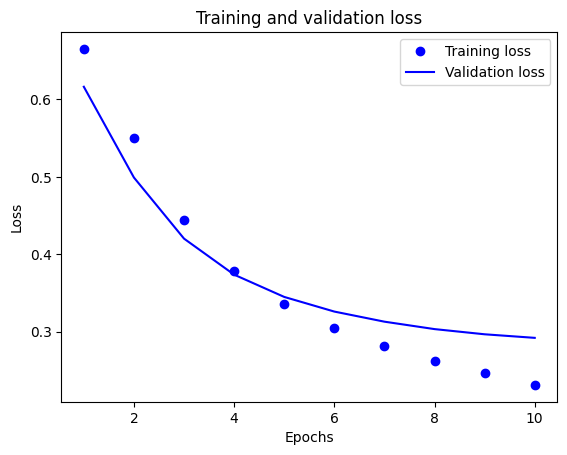

In [ ]:
acc = history_dict['binary_accuracy'] # Plotting Training and Validation Loss Over Epochs

val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The provided code plots the training and validation accuracy over epochs using Matplotlib

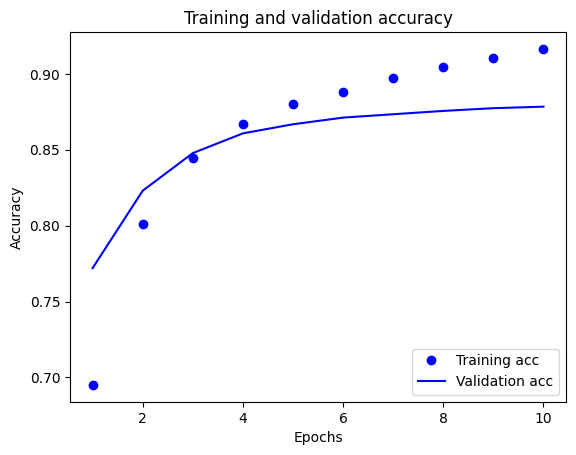

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc') # Plotting Training and Validation Accuracy Over Epochs

plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


The provided code snippet creates an export model for inference, which includes a vectorization layer and the trained classification model. Then, it compiles the export model and evaluates its performance using a test dataset consisting of raw text strings.

# <span style="color: #FF4500;">Step 10:</span> <span style="color: orange; font-weight: bold;">  Explore The Model</span>

In [ ]:
export_model = tf.keras.Sequential([  # # Exporting and Evaluating Model for Inference

  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 5s 7ms/step - loss: 0.5882 - accuracy: 0.5000
0.5



The provided code snippet creates a TensorFlow constant containing examples of text

# <span style="color: #FF4500;">Step 11:</span> <span style="color: orange; font-weight: bold;"> Interface On New Data  </span>

In [ ]:
examples = tf.constant([   # Defining Examples of Text Data

  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
])

export_model.predict(examples)

1/1 [==============================] - 0s 129ms/step


array([[0.6466978],
       [0.604934 ],
       [0.5849364]], dtype=float32)

<p style="background-color: #800080;font-family:Arial, sans-serif;color:white ;font-size:20px;text-align:center;padding:20px;border-radius:20px;">
   If you found this notebook beneficial, I'd greatly appreciate an upvote! 🌟 Feel free to drop a comment for any questions or suggestions you might have. 📝 Your feedback is valuable and helps me improve. Thank you for your support! 🙏".<br>
    <strong>✨Best Wishes✨</strong>
</p>